In [1]:
import zipfile
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
def ignore_warn(*args,**kwargs):
    pass
warnings.warn=ignore_warn

In [3]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm,skew
from scipy import stats

## Loading

In [4]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [5]:
with open('data_description.txt','r') as file:
    print(file.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [6]:
pd.set_option('display.max_columns',100)

## Exploraton

In [7]:
train_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [8]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
train_df.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


### Missing Values

In [10]:
total=train_df.isna().sum().sort_values(ascending=False)
percentage=total/train_df.isna().count()*100
pd.DataFrame([total,percentage],index=['Total','Percentage']).T.head(19)

,Total,Percentage
PoolQC,1453.0,99.520548
MiscFeature,1406.0,96.301370
Alley,1369.0,93.767123
Fence,1179.0,80.753425
FireplaceQu,690.0,47.260274
LotFrontage,259.0,17.739726
GarageCond,81.0,5.547945
GarageType,81.0,5.547945
GarageYrBlt,81.0,5.547945
GarageFinish,81.0,5.547945


### Kurtosis & Skewness

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

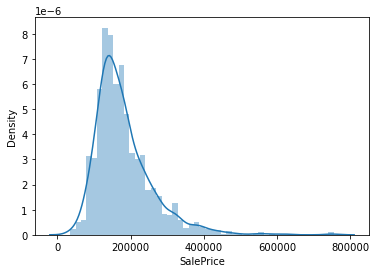

In [11]:
sns.distplot(train_df.SalePrice)
## Right Skewness,

In [12]:
print(f'Kurtosis: {train_df.SalePrice.kurt()}')
print(f'Skewness: {train_df.SalePrice.skew()}')

Kurtosis: 6.536281860064529
Skewness: 1.8828757597682129


### Verify Hypothesis

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

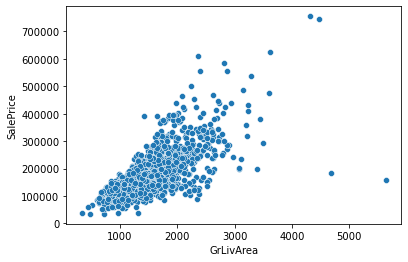

In [13]:
sns.scatterplot(train_df['GrLivArea'], train_df.SalePrice)

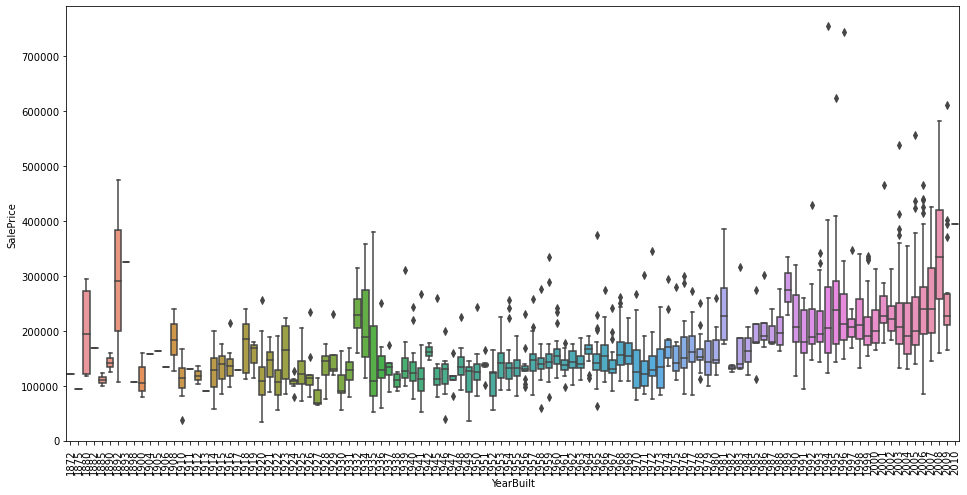

In [14]:
fig,ax=plt.subplots(figsize=(16,8))
sns.boxplot('YearBuilt','SalePrice',data=train_df)
plt.xticks(rotation=90);

### Heatmap

<AxesSubplot:>

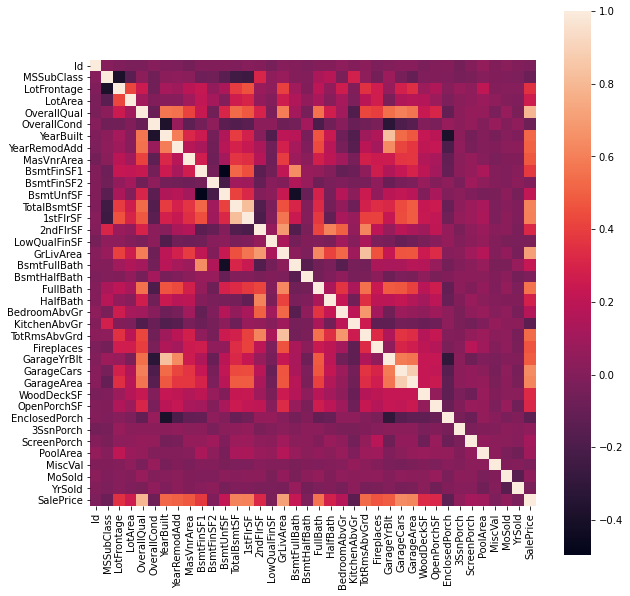

In [15]:
fig,ax=plt.subplots(figsize=(10,10))
corrmat=train_df.corr()
sns.heatmap(corrmat,square=True,ax=ax)

<AxesSubplot:>

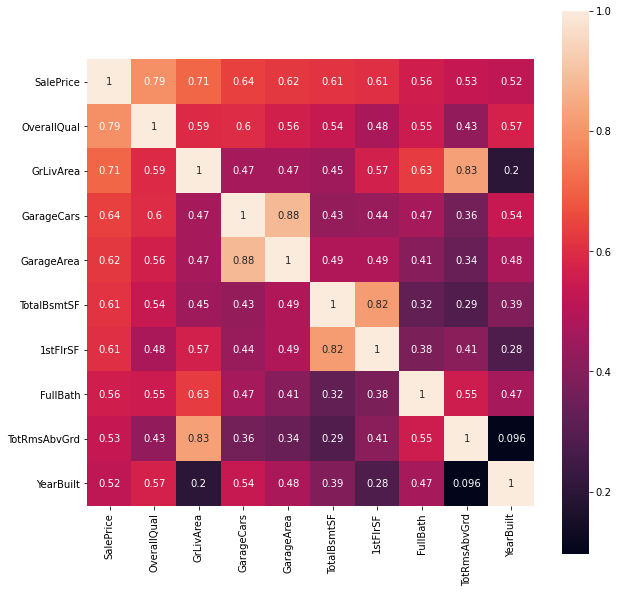

In [16]:
# Finding the 10 most relevant attributes
fig,ax=plt.subplots(figsize=(10,10))
cols=corrmat.nlargest(10,'SalePrice').SalePrice.index
coef=np.corrcoef(train_df[cols].values.T)
sns.heatmap(coef,cbar=True,square=True,xticklabels=cols,yticklabels=cols,annot=True,annot_kws={'size':10})

## Data Engineering

### Combine Datasets 

In [20]:
print(f'The shape of training data is: {train_df.shape}')
print(f'The shape of test data is: {test_df.shape}')

The shape of training data is: (1460, 81)
The shape of test data is: (1459, 80)


In [21]:
train_rows=train_df.shape[0]
test_rows=test_df.shape[0]
y=train_df.SalePrice
data=pd.concat([train_df,test_df],axis=0,ignore_index=True)

In [24]:
data.drop('SalePrice',axis=1,inplace=True)
data.drop('Id',axis=1,inplace=True)

### Missing Values

In [25]:
total=data.isna().sum().sort_values(ascending=False)
percentage=total/data.isna().count()
pd.DataFrame([total,percentage],index=['Total','Percentage']).T.head(18)

,Total,Percentage
PoolQC,2909.0,0.996574
MiscFeature,2814.0,0.964029
Alley,2721.0,0.932169
Fence,2348.0,0.804385
FireplaceQu,1420.0,0.486468
LotFrontage,486.0,0.166495
GarageCond,159.0,0.054471
GarageQual,159.0,0.054471
GarageYrBlt,159.0,0.054471
GarageFinish,159.0,0.054471


#### Drop Columns

In [26]:
data=data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],axis=1)

#### Garage Missing Values

In [27]:
data['GarageQual']=data.GarageQual.fillna('NA')
data['GarageYrBlt']=data.GarageYrBlt.fillna('NA')
data['GarageFinish']=data.GarageFinish.fillna('NA')
data['GarageCond']=data.GarageCond.fillna('NA')
data['GarageType']=data.GarageType.fillna('NA')

#### Basement & Masonry Veneer Missing Values 

In [28]:
def missing_na(value,*column):
    for i in column:
        data[i]=data[i].fillna(value)

In [29]:
missing_na('NA','BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1','KitchenQual')

In [30]:
missing_na('None','MasVnrType')
missing_na(0,'MasVnrArea')

#### Small Missing values

In [31]:
def missing_mode(*column):
    for i in column:
        data[i]=data[i].fillna(data[i].mode()[0])
def missing_median(*column):
    for i in column:
        data[i]=data[i].fillna(data[i].median())

In [33]:
missing_mode('MSZoning','Functional','BsmtHalfBath','Utilities','BsmtFullBath','Electrical','Exterior2nd','GarageCars','Exterior1st','KitchenQual','SaleType')

In [34]:
missing_median('BsmtFinSF1','GarageArea','TotalBsmtSF','BsmtUnfSF','BsmtFinSF2')

### Transform numerical variables that are actually categorical

Features need to be transformed
`MSSubClass`,`MoSold`

In [35]:
def num_to_cat(*var):
    for i in var:
        data[i]=data[i].astype('str')

In [36]:
num_to_cat('MSSubClass','MoSold')

### Transform categorical variables that contains information in the order

In [91]:
params_to_trans=[{'Utilities': {'AllPub':3,'NoSewr':2,'NoSeWa':1,'ELO':0},
    'ExterQual':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
    'ExterCond':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
    'BsmtQual':{'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'BsmtCond':{'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'BsmtExposure':{'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4},
    'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6},
    'BsmtFinType2':{'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6},
    'HeatingQC':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
    'CentralAir':{'Y':1,'N':0},
    'KitchenQual':{'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'Functional':{'Typ':6, 'Min1':5, 'Maj1':2, 'Min2':4, 'Mod':3, 'Maj2':1, 'Sev':0},
    'GarageFinish':{'RFn':2, 'Unf':1, 'Fin':3, 'NA':0},
    'GarageQual':{'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'GarageCond':{'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'PavedDrive':{'N':0,'P':1,'Y':2}}]
data=data.replace(params_to_trans[0])

In [94]:
for key,value in params_to_trans[0].items():
    if data[key].dtype!='int64':
        print(value)

### Creating a Total Area Feature

In [98]:
data['TotalArea']=data['TotalBsmtSF']+data['2ndFlrSF']+data['1stFlrSF']

### Skewed features

In [99]:
feat_skew_index=data.columns[data.dtypes!='object']
feat_skew=data[feat_skew_index].skew().sort_values(ascending=False)
feat_skew

MiscVal          21.958480
PoolArea         16.907017
LotArea          12.829025
LowQualFinSF     12.094977
3SsnPorch        11.381914
KitchenAbvGr      4.304467
BsmtFinSF2        4.148275
EnclosedPorch     4.005950
ScreenPorch       3.948723
BsmtHalfBath      3.933616
BsmtFinType2      3.153959
MasVnrArea        2.614936
OpenPorchSF       2.536417
WoodDeckSF        1.843380
TotalArea         1.516515
1stFlrSF          1.470360
BsmtFinSF1        1.426111
ExterCond         1.316590
GrLivArea         1.270010
TotalBsmtSF       1.163214
BsmtExposure      1.117303
BsmtUnfSF         0.920176
2ndFlrSF          0.862118
ExterQual         0.786786
TotRmsAbvGrd      0.758757
Fireplaces        0.733872
HalfBath          0.694924
BsmtFullBath      0.625153
OverallCond       0.570605
KitchenQual       0.387022
BedroomAbvGr      0.326492
GarageArea        0.241308
OverallQual       0.197212
FullBath          0.167692
GarageFinish      0.135604
YrSold            0.132467
BsmtFinType1     -0.149621
G

#### Box Cox Transformation

In [100]:
feat_skew=feat_skew[abs(feat_skew)>1]
print(f'There are {feat_skew.shape[0]} skewed features to be transformed')

There are 29 skewed features to be transformed


In [101]:
from scipy.special import boxcox1p
skewed_features=feat_skew.index
lam=0.15
for feat in skewed_features:
    data[feat]=boxcox1p(data[feat],lam)

### Dummy Variables

In [102]:
data=pd.get_dummies(data)
print(data.shape)

(2919, 347)


### Outliers

#### Return train_df & test_df

In [103]:
train_df=data[:train_rows]
train_df['SalePrice']=y
test_df=data[train_rows:]
test_df.reset_index(drop=True,inplace=True)

#### Get Rid of Outliers

In [104]:
scaler=StandardScaler()
price_trans=scaler.fit_transform(train_df.SalePrice[:,np.newaxis])
low_range=price_trans[price_trans[:,0].argsort()][:10]
high_range=price_trans[price_trans[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

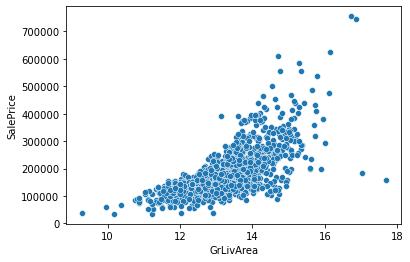

In [105]:
sns.scatterplot('GrLivArea','SalePrice',data=train_df)

In [106]:
gr_index=train_df.GrLivArea.sort_values(ascending=False)[:2].index
#train_df.iloc[gr_index].SalePrice
train_df=train_df.drop(gr_index,axis=0)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

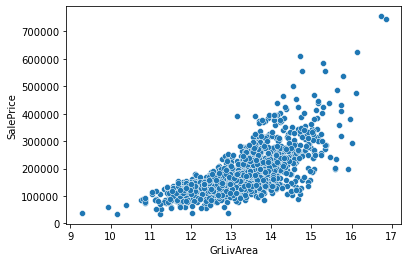

In [107]:
sns.scatterplot('GrLivArea','SalePrice',data=train_df)

### Target Variable Skewness

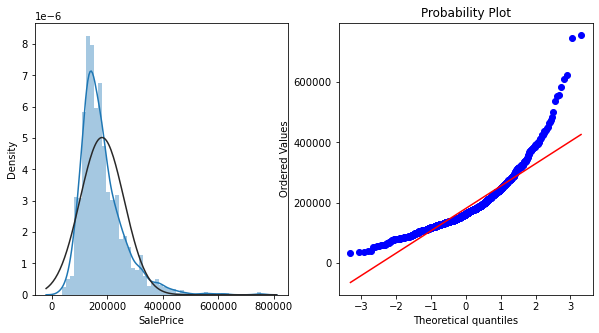

In [108]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.distplot(train_df['SalePrice'],fit=norm,ax=axes[0])
stats.probplot(train_df['SalePrice'],plot=plt);

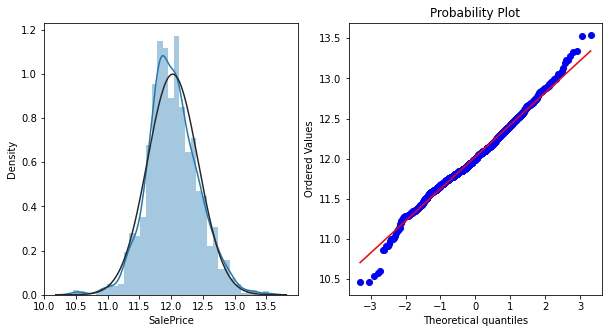

In [109]:
train_df['SalePrice']=np.log(train_df.SalePrice)
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.distplot(train_df['SalePrice'],fit=norm,ax=axes[0])
stats.probplot(train_df['SalePrice'],plot=plt);

## Modeling and Prediction

In [110]:
x_train=train_df.drop('SalePrice',axis=1).values
y_train=train_df.SalePrice.values

In [181]:
x_test=test_df.values

In [185]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
import lightgbm as lgb

In [112]:
n_fold=5
def cross_validation(model):
    # shuffle data prior to cross_validation and return the number of splitting iterations in the cross_validator
    kf=KFold(n_fold,shuffle=True,random_state=42).get_n_splits(x_train)
    rmse=np.sqrt(-cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_error',cv=kf))
    return(rmse)

### Base models

In [114]:
alpha=np.linspace(0.0001,0.005,100)
param_grid={'alpha':alpha}
random_search=RandomizedSearchCV(Lasso(),param_grid,random_state=1,n_iter=300,cv=5,verbose=0,n_jobs=-1)
random_search.fit(x_train,y_train)
random_search.best_params_

{'alpha': 0.0004959595959595959}

In [113]:
# Robustscaler() makes the model less sensitiv
lasso=make_pipeline(RobustScaler(),Lasso(alpha=0.0005,random_state=1))

In [115]:
alpha=np.linspace(0.0001,0.005,500)
l1_ratio=np.linspace(0,1,500)
param_grid={'alpha':alpha,
           'l1_ratio':l1_ratio}
random_search=RandomizedSearchCV(ElasticNet(),param_grid,n_iter=400,cv=5,verbose=0)
random_search.fit(x_train,y_train)
random_search.best_params_

{'l1_ratio': 0.8517034068136272, 'alpha': 0.0005713426853707415}

In [116]:
random_search.score(x_train,y_train)

0.9390420973437648

In [136]:
ENet_new=make_pipeline(RobustScaler(),ElasticNet(alpha=0.00024,l1_ratio= 1.87))

In [121]:
alpha=np.linspace(0,1,500)
degree=np.arange(1,8,1)
coef0=np.linspace(0,5,100)
param_grid={'alpha':alpha,
            'degree':degree,
            'coef0':coef0}
random_search=RandomizedSearchCV(KernelRidge(kernel='polynomial'),param_grid,n_iter=500,cv=5,verbose=0)
random_search.fit(x_train,y_train)
random_search.best_params_

{'degree': 1, 'coef0': 1.3636363636363635, 'alpha': 0.04809619238476953}

In [122]:
random_search.score(x_train,y_train)

0.9421832376346462

In [123]:
KRR_new=KernelRidge(alpha=0.048,kernel='polynomial',degree=1,coef0=1.36)

In [129]:
n_estimators=np.arange(400,1000,100)
learning_rate=np.linspace(0,0.8,300)
max_depth=np.arange(2,8,1)
min_samples_leaf=np.arange(10,20,1)
min_samples_split=np.arange(3,15,1)
param_grid={'n_estimators':n_estimators,
            'learning_rate':learning_rate,
            'max_depth':max_depth,
            'min_samples_leaf':min_samples_leaf,
            'min_samples_split':min_samples_split}
random_search=RandomizedSearchCV(GradientBoostingRegressor(max_features='sqrt',loss='huber'),param_grid,n_iter=500,cv=5,verbose=0)
random_search.fit(x_train,y_train)
random_search.best_params_

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_depth': 3,
 'learning_rate': 0.05886287625418061}

In [130]:
random_search.score(x_train,y_train)

0.9659349029828275

In [131]:
# huber loss makes it more robust to ouliers
Gboost_new=GradientBoostingRegressor(n_estimators=900,min_samples_split=5,min_samples_leaf=10,max_depth=3,learning_rate=0.059,
                                    max_features='sqrt',loss='huber')

### Tune XGB 

In [191]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
random_search=RandomizedSearchCV(XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),param_test1,n_iter=500,cv=5)
random_search.fit(x_train,y_train)
random_search.best_params_

[16:03:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




ValueError: continuous is not supported

In [ ]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [148]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,
                             random_state =7, nthread = -1)

In [156]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

#### Base model scores

In [127]:
cross_validation(lasso).mean()

0.10893165680905928

In [82]:
cross_validation(ENet_new).mean()

0.10819993776409884

In [124]:
cross_validation(KRR_new).mean()

0.11175348507367773

In [132]:
cross_validation(Gboost_new).mean()

0.11469896398447696

In [150]:
cross_validation(model_xgb).mean()

0.11438581499534986

In [157]:
cross_validation(model_lgb).mean()

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] 

0.11500333961079537

### Stacking Models

Averaging base models,we build a new class to extend scikit_learn with our model and also to leverage encapsulation and code reuse

In [134]:
class SimpleStacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,models):
        self.models=models
    
    #Now we fit the data
    def fit(self,X,y):
        self.models_=[clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X,y)
        
        return self
    
    #Now we predict
    def predict(self,x_test):
        predictions=np.column_stack([model.predict(x_test) for model in self.models_])
        
        return np.mean(predictions,axis=1)

In [137]:
averaged_models=SimpleStacking(models=(ENet_new,Gboost_new,KRR_new,lasso))
score=cross_validation(averaged_models).mean()
score

0.10727831485801217

In [59]:
averaged_models.fit(x_train,y_train)
attempt_1st=averaged_models.predict(test_df)

## Submission

In [144]:
test_get_id=pd.read_csv('sample_submission.csv')
test_id=test_get_id.Id

In [184]:
sub=pd.DataFrame()
sub['Id']=test_id
sub['SalePrice']=stacked_pred
sub.to_csv('submission_4th',index=False)

### Less Simple Stacking

In [138]:
class ComplicatedStacking(BaseEstimator,RegressorMixin,TransformerMixin):
    def __init__(self,base_models,meta_model,n_folds=5):
        self.base_models=base_models
        self.meta_model=meta_model
        self.n_folds=n_folds
    #fit the data on clones of the base models
    def fit(self,X,y):
        self.base_models_=[list() for x in self.base_models]
        self.meta_model_=clone(self.meta_model)
        kfold=KFold(self.n_folds,shuffle=True,random_state=156)
        
        #train cloned base models then create out of fold predictions
        #that are needed to train the cloned meta_model
        out_of_fold_predictions=np.zeros((X.shape[0],len(self.base_models)))
        
        for i,model in enumerate(self.base_models):
            for train_index,holdout_index in kfold.split(X,y):
                instance=clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index],y[train_index])
                y_pred=instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index,i]=y_pred
        #Now train the cloned meta_model using the out of fold preditions as new feature
        self.meta_model_.fit(out_of_fold_predictions,y)
        return self
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta_feature for the final prediction which is done by the meta_model
    def predict(self,X):
        meta_feature=np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1) 
            for base_models in self.base_models_
        ])
        return self.meta_model_.predict(meta_feature)
                
    

In [166]:
stacked_averaged_models = ComplicatedStacking(base_models = (KRR_new,Gboost_new,ENet_new,model_xgb),
                                                 meta_model = lasso)

score = cross_validation(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1065 (0.0049)


In [183]:
# Use np.expm1 because of the log transformation used earlier
stacked_averaged_models.fit(x_train,y_train)
stacked_pred=np.expm1(stacked_averaged_models.predict(x_test))